# **Importando e analisando os dados**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost.sklearn import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

%matplotlib inline

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [53]:
dataset = pd.read_csv('credit_data.csv')

In [54]:
dataset

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [56]:
dataset.dropna(inplace=True)

In [57]:
#Verificando se há dados duplicados.
dataset.duplicated().value_counts()

False    1997
dtype: int64

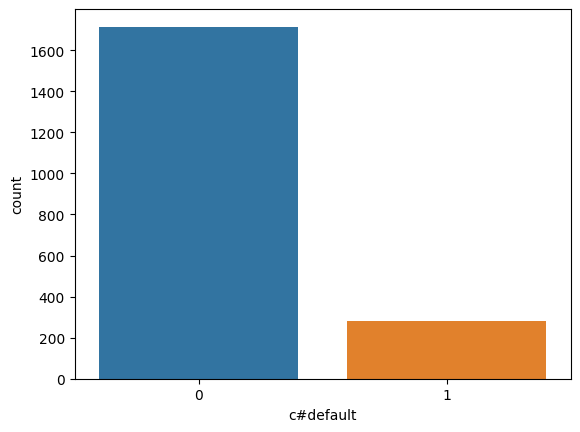

In [58]:
#c#defaul => 0 = Pagou o empréstimo | 1 = Não pagou
import seaborn as sns
sns.countplot(x=dataset['c#default']);

In [59]:
dataset.describe()

,i#clientid,income,age,loan,c#default
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.956935,45333.864334,40.807559,4445.487716,0.141713
std,576.702206,14325.131177,13.624469,3046.792457,0.348842
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,503.000000,32804.904487,28.990415,1936.813257,0.000000
50%,1002.000000,45788.747100,41.317159,3977.287432,0.000000
75%,1501.000000,57787.565659,52.587040,6440.861434,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [60]:
dataset.corr()

,i#clientid,income,age,loan,c#default
i#clientid,1.000000,0.039133,-0.014704,0.018358,-0.021217
income,0.039133,1.000000,-0.033687,0.441539,0.002222
age,-0.014704,-0.033687,1.000000,0.002309,-0.429759
loan,0.018358,0.441539,0.002309,1.000000,0.377169
c#default,-0.021217,0.002222,-0.429759,0.377169,1.000000


<Axes: >

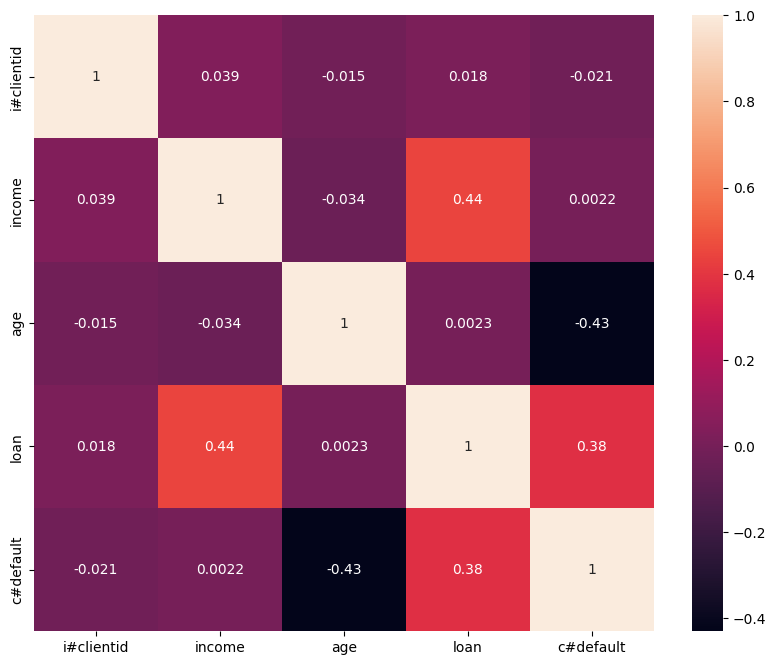

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True)

In [72]:
ssc = StandardScaler()

ssc.fit(dataset[['income', 'age', 'loan']])
h= ssc.transform(dataset[['income', 'age', 'loan']])
dataset[['income', 'age', 'loan']] = h

In [73]:
dataset

,i#clientid,income,age,loan,c#default
0,1,1.453898,1.336861,1.201907,0
1,2,-0.762398,0.536639,0.695744,0
2,3,0.836733,1.637207,1.173812,0
3,4,-0.183244,0.362998,0.544366,0
4,5,1.509532,-1.631534,1.419754,1
...,...,...,...,...,...
1995,1996,0.969671,0.566081,-0.826899,0
1996,1997,1.688523,-1.295454,-0.309357,0
1997,1998,-0.071390,-0.939016,0.353673,1
1998,1999,-0.110170,1.700619,-0.926703,0


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

# **Naïve Bayes**

In [82]:
#Separando o que é features e target:
X = dataset.drop(columns=["i#clientid", "c#default"])
y = dataset["c#default"]

# Dividindo em dados de teste e dados de treino, peguei 30% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3, stratify=y)

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [83]:
previsoes = nb.predict(X_test)

In [87]:
previsoes[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [90]:
y_test[:10]

1883    0
1046    1
1201    0
1410    0
438     0
586     0
1093    1
1195    0
1004    1
218     0
Name: c#default, dtype: int64

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,previsoes) 

0.94

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,previsoes) 
cm

array([[170,   2],
       [ 10,  18]])

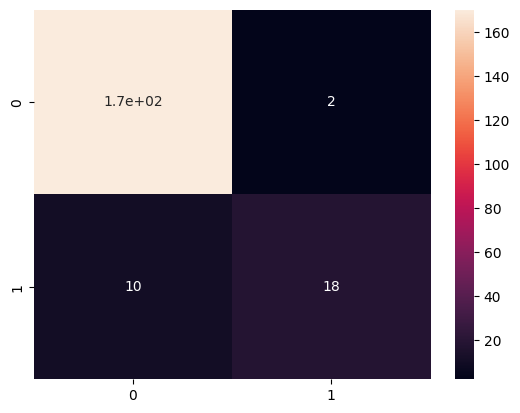

In [94]:
sns.heatmap(cm, annot=True);

In [ ]:
cm = confusion_matrix(y_test,previsoes) 
cm

#**KerasClassifier**

In [ ]:
!pip install scikeras

In [101]:
import tensorflow as tf
from keras import backend as k
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [96]:
dataset

,i#clientid,income,age,loan,c#default
0,1,1.453898,1.336861,1.201907,0
1,2,-0.762398,0.536639,0.695744,0
2,3,0.836733,1.637207,1.173812,0
3,4,-0.183244,0.362998,0.544366,0
4,5,1.509532,-1.631534,1.419754,1
...,...,...,...,...,...
1995,1996,0.969671,0.566081,-0.826899,0
1996,1997,1.688523,-1.295454,-0.309357,0
1997,1998,-0.071390,-0.939016,0.353673,1
1998,1999,-0.110170,1.700619,-0.926703,0


In [ ]:
y_train = np.nan_to_num(y_train)
X_train = np.nan_to_num(X_train)

**Dividindo os dados em target e features e aplicando a divisão de dados de treino e dados de teste.**

**Construino a rede...**

In [97]:
X = dataset.drop(columns=["i#clientid", "c#default"])
y = dataset["c#default"]

#====================================================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

def criarRede(optimizer='rmsprop', init='glorot_uniform'):
    k.clear_session()
    rn = Sequential([
               #1ª camada oculta
               tf.keras.layers.Dense(units=2, activation = "relu", kernel_initializer = "random_uniform", input_dim=3), # input_dim = nº de colunas
               tf.keras.layers.Dropout(0.2),
               #2ª camada oculta
               tf.keras.layers.Dense(units=2, activation = "relu", kernel_initializer = "random_uniform"),
               tf.keras.layers.Dropout(0.2), #Dropout = % de colunas zeradas para não dar overfitting! Recomendável entre 0.2 e 0.3
               #Camada de saída
               tf.keras.layers.Dense(units= 1, activation = 'sigmoid')])
    

    rn.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ['binary_accuracy'])


    return rn

In [98]:
print(X_train.shape, y_train.shape)

(1797, 3) (1797,)


In [103]:
rn = KerasClassifier(model=criarRede)
#============================================================================================
optimizers = ['adam']
init = ['uniform']
epochs = [1000]
batches = [20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, model__init=init)

#================================================================================
grid_search = GridSearchCV(estimator=rn,
                           param_grid=param_grid,
                           scoring="accuracy",
                           cv=10)

grid_search = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A saída de streaming foi truncada nas últimas 5000 linhas.
81/81 [==============================] - 0s 2ms/step - loss: 0.2646 - binary_accuracy: 0.8578
Epoch 503/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2582 - binary_accuracy: 0.8578
Epoch 504/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2672 - binary_accuracy: 0.8578
Epoch 505/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2595 - binary_accuracy: 0.8578
Epoch 506/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2625 - binary_accuracy: 0.8578
Epoch 507/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2635 - binary_accuracy: 0.8578
Epoch 508/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2665 - binary_accuracy: 0.8578
Epoch 509/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2729 - binary_accuracy: 0.8578
Epoch 510/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2594 -

**Salvar o modelo:**

In [ ]:
import pickle

In [ ]:
with open("grid_search.pkl", "wb") as f:
    pickle.dump(grid_search, f)

In [ ]:
with open("grid_search.pkl", "rb") as f:
    
    grid_search = pickle.load(f)

In [107]:
grid_search.best_params_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'batch_size': 20,
 'epochs': 1000,
 'model__init': 'uniform',
 'optimizer': 'adam'}

**Score:**

In [108]:
print(f"O melhor score foi de {(grid_search.best_score_)*100:.2f}%")

O melhor score foi de 88.93%


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Superamos o XGBoost e Otimização Bayesiana

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Métricas de avaliação de treino:
90/90 [==============================] - 0s 2ms/step
[[1542    0]
 [ 255    0]]


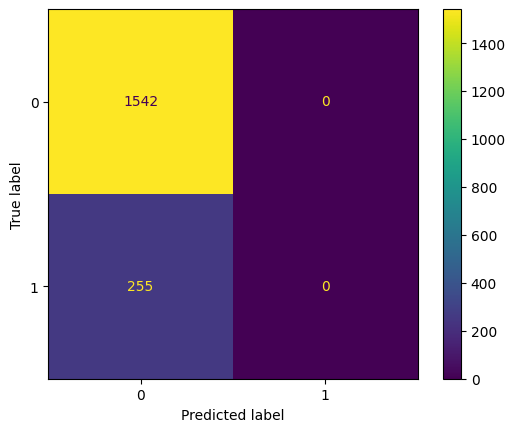

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1542
           1       0.00      0.00      0.00       255

    accuracy                           0.86      1797
   macro avg       0.43      0.50      0.46      1797
weighted avg       0.74      0.86      0.79      1797


Métricas de avaliação de teste:
10/10 [==============================] - 0s 1ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[172   0]
 [ 28   0]]


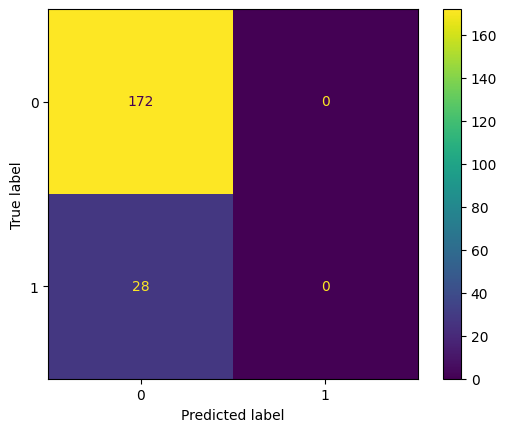

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       172
           1       0.00      0.00      0.00        28

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.74      0.86      0.80       200



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_search.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_search.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test));

In [ ]:
tabela = pd.DataFrame()
tabela["y real"] = y_test
tabela["y preditivo"] = y_pred_test
tabela

,y real,y preditivo
80,0,1
157,1,1
65,1,1
489,1,1
804,1,1
...,...,...
19,1,1
208,1,0
627,0,1
357,0,1


Salvando a tabela...

In [ ]:
tabela.to_csv("tabela_comparação.csv")

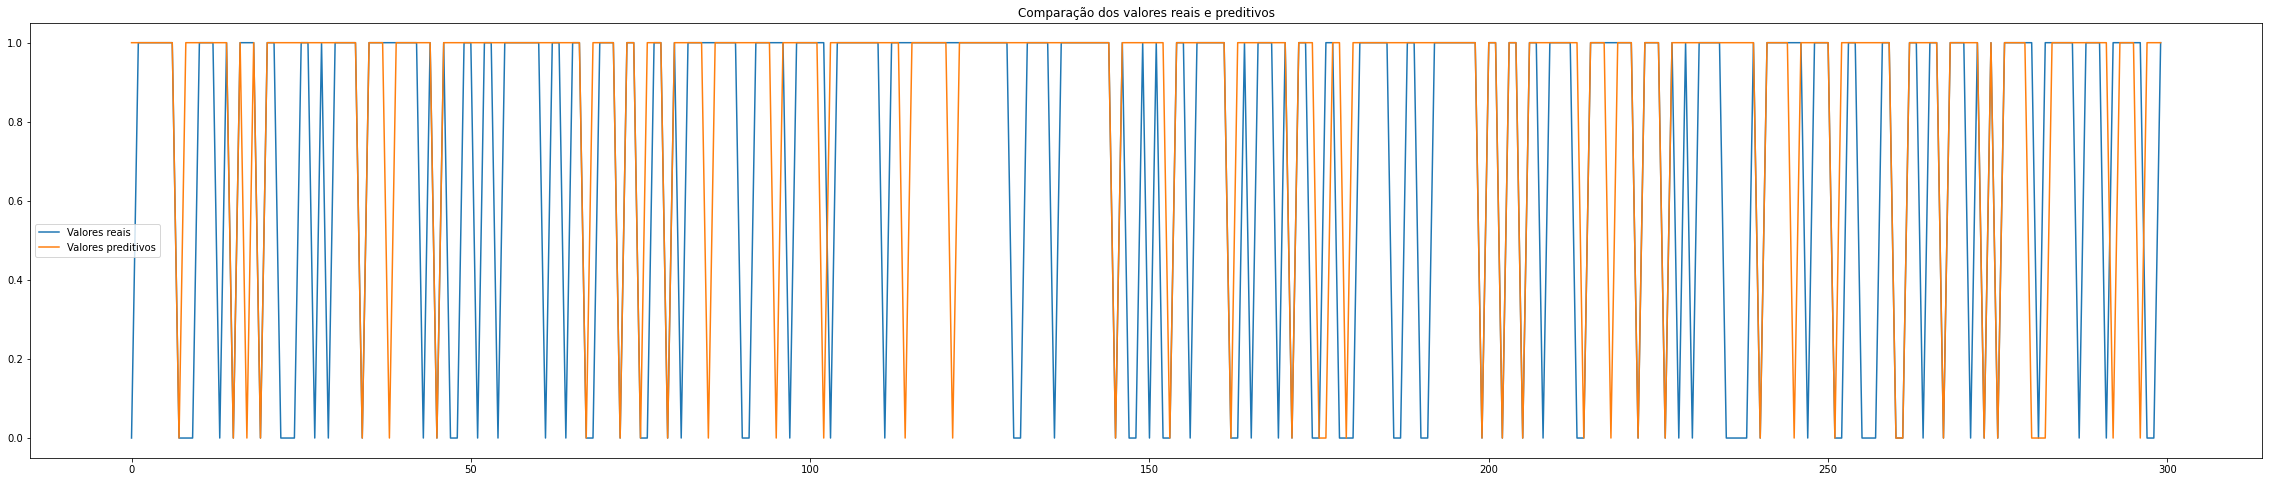

In [ ]:
plt.figure(figsize=(40,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Valores reais")
plt.plot(x_ax, y_pred_test, label="Valores preditivos")
plt.title("Comparação dos valores reais e preditivos")
plt.legend()
plt.show();